# Supplementary Figure S3

### Setups

In [1]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(ggsci)
library(patchwork)
library(aplot)
library(ggrastr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Functions 

In [2]:
set.seed(7)

In [3]:
plot_confounder_embedding<-function(anot.embed,...){
    
    col.pal <- colorRampPalette(colors = c( "#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"))
    
    colnames(anot.embed)<-gsub("_.*","",colnames(anot.embed))
    
    p1<-anot.embed %>%
        ggplot(.,aes(x=PC1,y=PC2,color=impurity))+
        rasterise(geom_point(size=1.25,na.rm=TRUE),dpi=300)+
        theme_pubr()+
        scale_color_gradientn(colours = col.pal(10))+
        theme(legend.position="right")
    
    p2<-anot.embed %>%
        ggplot(.,aes(x=PC1,y=PC3,color=impurity))+
        rasterise(geom_point(size=1.25,na.rm=TRUE),dpi=300)+
            theme_pubr()+
            scale_color_gradientn(colours = col.pal(10))+
            theme(legend.position="right")
    
    return(list(p1,p2))
}

### Load data

In [4]:
load("../input/tcga.metadata.RData")
load("../input/tcga.SE.splicing.embeddings.RData")
load("../input/tcga.gene.expression.embeddings.RData")

In [5]:
tcga.colors<-c("#EF9A9A","#F8BBD0","#CE93D8","#B39DDB","#9FA8DA",
               "#90CAF9","#81D4FA","#80DEEA","#80CBC4","#A5D6A7",
               "#C5E1A5","#E6EE9C","#FFF59D","#FFE082","#BCAAA4",
               "#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5",
               "#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50",
               "#8BC34A","#CDDC39","#FFC107","#FF9800","#795548",
               "#B71C1C")
names(tcga.colors)<-unique(metadata$cancer)

### Expression

In [6]:
gem<-left_join(metadata,gene_embed,by = "submitter_id") 

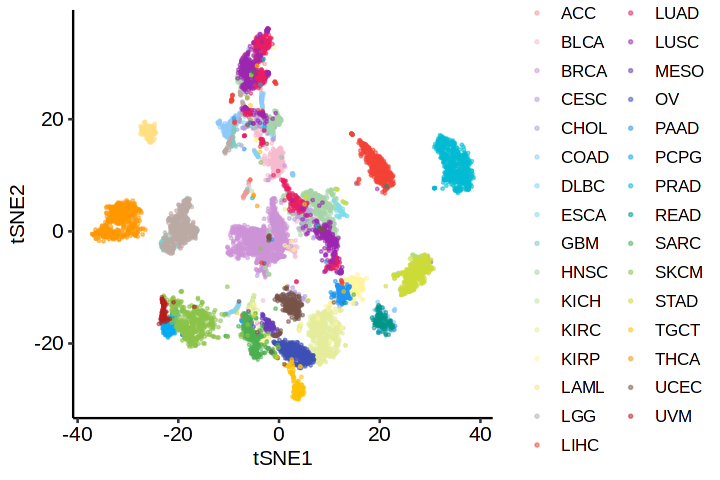

In [7]:
options(repr.plot.height=4,repr.plot.width=6)
p1<-ggplot(gem,aes(x=tSNE1_exp,y=tSNE2_exp,color=cancer))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        theme(legend.position="right")+
        scale_color_manual(values=tcga.colors)+
        labs(x="tSNE1",y="tSNE2")
p1

In [8]:
p2<-ggplot(gem,aes(x=tSNE1_exp,y=tSNE2_exp,color=condition))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        scale_color_manual(values=c("#155289","#CB2C28"))+
        labs(x="tSNE1",y="tSNE2")
p3<-gem %>%
    na.omit() %>%
    ggplot(.,aes(x=tSNE1_exp,y=tSNE2_exp,color=gender))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        scale_color_jama()+
        labs(x="tSNE1",y="tSNE2")
p4<-gem %>% 
    filter(impurity!=0) %>%
    ggplot(.,aes(x=tSNE1_exp,y=tSNE2_exp,color=impurity))+
        rasterise(geom_point(size=0.5),dpi=300)+
        theme_pubr()+
        scale_color_viridis_c(direction=-1)+
        labs(x="tSNE1",y="tSNE2")

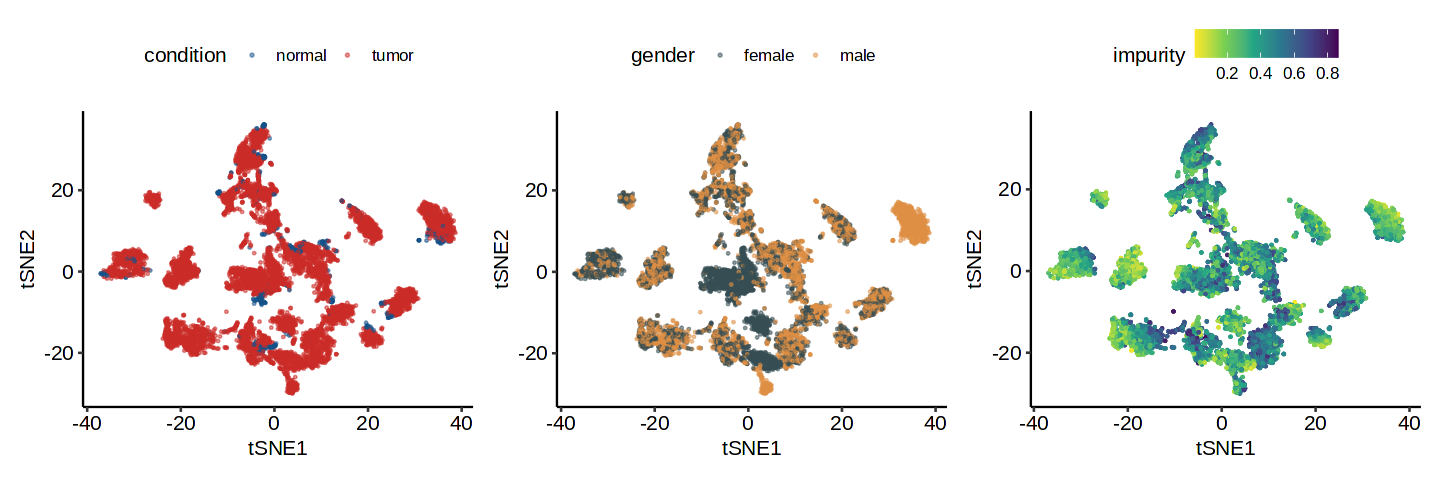

In [9]:
options(repr.plot.height=4,repr.plot.width=12)
p2+p3+p4

In [10]:
ggsave(p1,filename="../output/embeddings/global/tcga.gex.tSNE.embeding.cancerType.pdf",device="pdf",height = 4,width=4,units="in")
ggsave(p2,filename="../output/embeddings/global/tcga.gex.tSNE.embeding.condition.pdf",device="pdf",height = 4.5,width=4,units="in")
ggsave(p3,filename="../output/embeddings/global/tcga.gex.tSNE.embeding.gender.pdf",device="pdf",height = 4.5,width=4,units="in")
ggsave(p4,filename="../output/embeddings/global/tcga.gex.tSNE1_2.embeding.impurity.pdf",device="pdf",height = 4.5,width=4,units="in")

### Splicing

In [11]:
splem<-left_join(metadata,spl_embed,by = "submitter_id") 

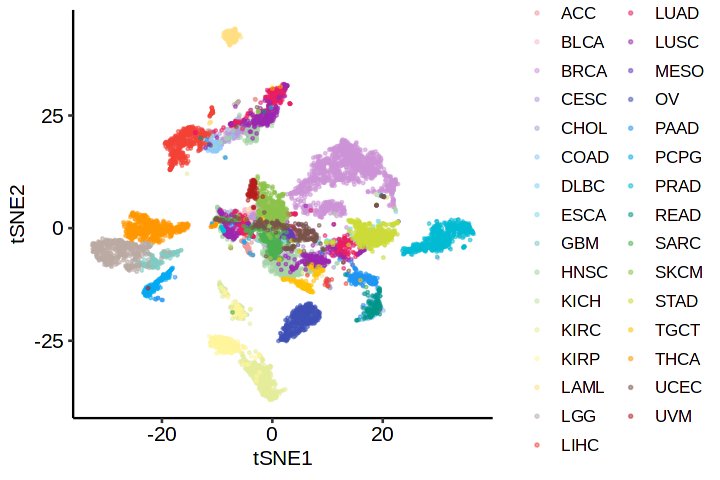

In [12]:
options(repr.plot.height=4,repr.plot.width=6)
p1<-ggplot(splem,aes(x=tSNE1_spl,y=tSNE2_spl,color=cancer))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        theme(legend.position="right")+
        scale_color_manual(values=tcga.colors)+
        labs(x="tSNE1",y="tSNE2")
p1

In [13]:
p2<-ggplot(splem,aes(x=tSNE1_spl,y=tSNE2_spl,color=condition))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        scale_color_manual(values=c("#155289","#CB2C28"))+
        labs(x="tSNE1",y="tSNE2")
p3<-splem %>%
    na.omit() %>%
    ggplot(.,aes(x=tSNE1_spl,y=tSNE2_spl,color=gender))+
        rasterise(geom_point(size=0.5,alpha=0.5),dpi=300)+
        theme_pubr()+
        scale_color_jama()+
        labs(x="tSNE1",y="tSNE2")
p4<-splem %>% 
    filter(impurity!=0) %>%
    ggplot(.,aes(x=tSNE1_spl,y=tSNE2_spl,color=impurity))+
        geom_point(size=0.5)+
        theme_pubr()+
        scale_color_viridis_c(direction=-1)+
        labs(x="tSNE1",y="tSNE2")

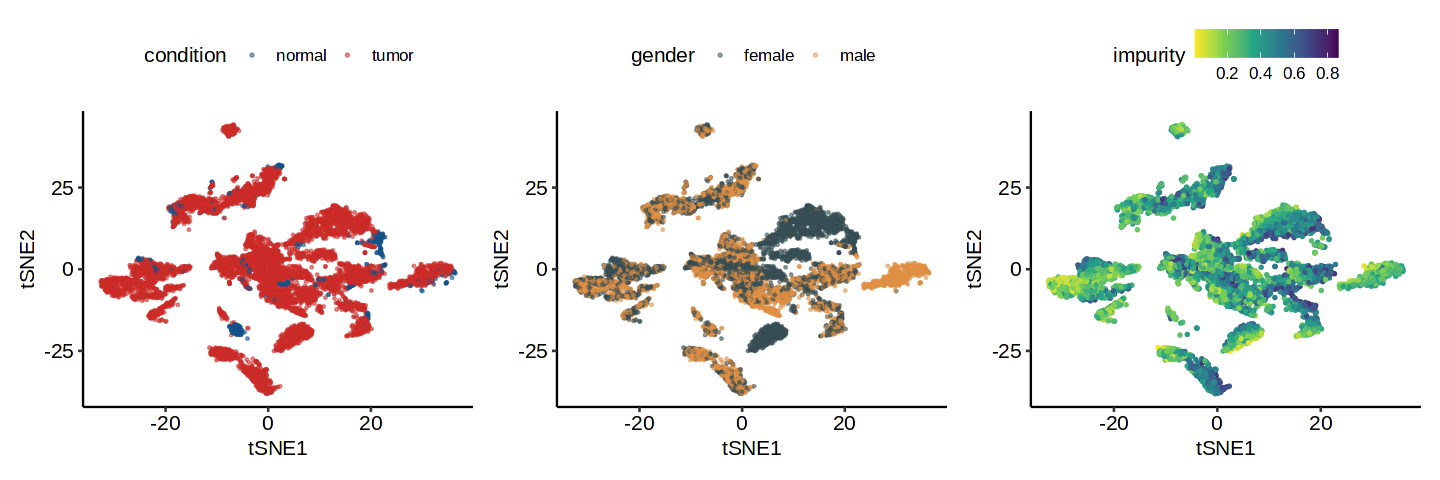

In [14]:
options(repr.plot.height=4,repr.plot.width=12)
p2+p3+p4

In [15]:
ggsave(p1,filename="../output/embeddings/global/tcga.spl.tSNE.embeding.cancerType.pdf",device="pdf",height = 4,width=4,units="in")
ggsave(p2,filename="../output/embeddings/global/tcga.spl.tSNE.embeding.condition.pdf",device="pdf",height = 4.5,width=4,units="in")
ggsave(p3,filename="../output//embeddings/global/tcga.spl.tSNE.embeding.gender.pdf",device="pdf",height = 4.5,width=4,units="in")
ggsave(p4,filename="../output/embeddings/global/tcga.spl.tSNE1_2.embeding.impurity.pdf",device="pdf",height = 4.5,width=4,units="in")